# Hybrid mixed finite element method for Darcy flow
---

In [1]:
from firedrake import *
import numpy as np
import random
try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

## Create a mesh

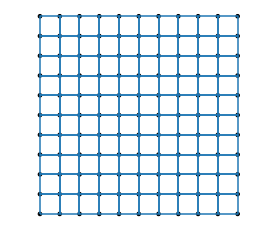

In [2]:
nx, ny = 10, 10
Lx, Ly = 1.0, 1.0
quadrilateral = True

if quadrilateral:
    DG = 'DQ'
    hdiv_family = 'RTCF'
else:
    DG = 'DG'
    hdiv_family = 'RT'

mesh = UnitSquareMesh(nx, ny, quadrilateral=quadrilateral)

plot(mesh)
plt.axis('off')
plt.show()

## Function spaces

In [3]:
degree = 1
U = FunctionSpace(mesh, hdiv_family, degree)
V = FunctionSpace(mesh, DG, degree - 1)
W = U * V

## Mesh entities

In [4]:
n = FacetNormal(mesh)
x, y = SpatialCoordinate(mesh)

## Source term definition

In [5]:
x, y = SpatialCoordinate(mesh)
f = Function(V)
f.interpolate(10*exp(-(pow(x - 0.5, 2) + pow(y - 0.5, 2)) / 0.02))

## Defining trial and test functions

In [6]:
sigma, u = TrialFunctions(W)
tau, v = TestFunctions(W)

## Boundary condition

In [7]:
solution = Function(W)
bc1 = DirichletBC(W[0], as_vector([0.0, -sin(5*x)]), 1)
bc2 = DirichletBC(W[0], as_vector([0.0, sin(5*y)]), 2)
bcs = [bc1, bc2]

## Variational form

In [8]:
a = (dot(sigma, tau) + div(tau) * u + v * div(sigma)) * dx
a += 0.5 * inner(sigma + grad(u), - tau + grad(v)) * dx
L = -f * v * dx + Constant(0.0) * dot(tau, n) * (ds(3) + ds(4))

## Solving the problem with hybridization

In [21]:
hybrid_params = {'mat_type': 'matfree',
                 'ksp_type': 'preonly',
                 'pc_type': 'python',
                 'pc_python_type': 'firedrake.HybridizationPC',
                 'hybridization': {'ksp_type': 'preonly',
                                   'pc_type': 'lu'}}

solve(a == L, solution, bcs=bcs, solver_parameters=hybrid_params)
# solve(a == L, w, bcs=bcs)
sigma_h, u_h = solution.split()
sigma_h.rename('Velocity', 'label')
u_h.rename('Pressure', 'label')

SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set

Exception ignored in: 'petsc4py.PETSc.traceback'
SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set


SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set

Exception ignored in: 'petsc4py.PETSc.traceback'
SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set


SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set

Exception ignored in: 'petsc4py.PETSc.traceback'
SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set


SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set

Exception ignored in: 'petsc4py.PETSc.traceback'
SystemError: <built-in method insert of list object at 0x7f9eff337688> returned a result with an error set


## Plotting the velocity field

In [ ]:
plot(sigma_h)
plt.show()

## Plotting the pressure field

In [ ]:
plot(u_h)
plt.show()

## Number of Degrees of Freedom

In [ ]:
solution.node_set.size

# Adding Hughes stabilization
---

In [ ]:
solution_hughes = Function(W)

In [ ]:
a += 0.5 * inner(sigma + grad(u), - tau + grad(v)) * dx

In [ ]:
solve(a == L, solution_hughes, bcs=bcs, solver_parameters=hybrid_params)
# solve(a == L, w, bcs=bcs)
sigma2_h, u2_h = solution.split()
sigma2_h.rename('Velocity', 'label')
u2_h.rename('Pressure', 'label')